<a href="https://colab.research.google.com/github/ct24-saretmedina/nose/blob/main/PROYECTO_FINAL_GRUPO_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Preparación de Datos

**Carga de datos:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

prod = pd.read_csv("/content/datos agua.csv")
enf  = pd.read_csv("/content/hidroalimentarias.csv")
cons_raw = pd.read_csv("/content/consumo.csv", header=None, names=[f'col_{i}' for i in range(6)])

In [ ]:
# Extrae los encabezados de año de la segunda fila (índice 1) de los datos sin procesar (columnas col_1 a col_5)
years = [int(float(x)) for x in cons_raw.iloc[1, 1:6].dropna().values]
# years será una lista de años
# .iloc selecciona la posición (fila/columna por indice numerico)


# Extrae tipos de usuario de las filas de datos (índice 2 en adelante), primera columna (col_0)
users = cons_raw.iloc[2:, 0].tolist()
# Extrae datos numéricos de las filas de datos (índice 2 en adelante), columnas col_1 a col_5
data = cons_raw.iloc[2:, 1:6].values

# Sirve para separar la columna de etiquetas (users) y los datos numéricos (data) para construir luego una tabla limpia.


# Construcción del DataFrame real, asegurando que los nombres de las columnas se asignen correctamente
df_data = {"Tipo de usuario": users}
for i, year in enumerate(years): # Recorre la lista years devolviendo i (posición) y year (valor)
    df_data[year] = data[:, i] # Toma la columna i de la matriz data (todas las filas : y columna i)

cons = pd.DataFrame(df_data) # Convierte el diccionario en una tabla cons con columnas
# Asi se reconstruye la tabla de consumo con los años como nombres de columnas

# Quita espacios por si acaso
prod.columns = prod.columns.str.strip()
cons.columns = cons.columns.str.strip()
enf.columns  = enf.columns.str.strip()

**Exploración inicial:**

In [ ]:
# Producción de agua potable
producto.describe()
prod.describe()


,2018,2019,2020,2021,2022
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,130.881818,128.736364,131.063636,130.509091,133.772727
std,222.738079,219.133481,223.536423,221.458861,226.303809
min,3.700000,3.900000,4.300000,3.900000,4.200000
25%,16.950000,18.000000,18.000000,18.850000,19.000000
50%,21.600000,22.400000,23.200000,25.100000,26.200000
75%,95.000000,96.050000,96.650000,97.800000,100.850000
max,718.800000,708.100000,720.900000,717.800000,735.800000


In [ ]:
prod.info()
prod.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Provincia  11 non-null     object 
 1   2018       11 non-null     float64
 2   2019       11 non-null     float64
 3   2020       11 non-null     float64
 4   2021       11 non-null     float64
 5   2022       11 non-null     float64
dtypes: float64(5), object(1)
memory usage: 660.0+ bytes


,Provincia,2018,2019,2020,2021,2022
0,TOTAL,718.8,708.1,720.9,717.8,735.8
1,Bocas del Toro,20.1,22.4,23.2,25.1,23.4
2,Coclé,19.9,22.3,22.2,22.6,23.4
3,Colón,69.3,66.9,67.8,69.7,67.9
4,Chiriquí,61.5,49.2,49.7,48.1,55.6


In [ ]:
# Consumo
cons.describe()

,Tipo de usuario,NaN,NaN,NaN,NaN,NaN
count,4,4,4.0,4.0,4.0,4.0
unique,4,4,4.0,4.0,4.0,4.0
top,Comercial,65,65.0,60.0,58.0,60.0
freq,1,1,1.0,1.0,1.0,1.0


In [ ]:
cons.info()
cons.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tipo de usuario  4 non-null      object
 1   nan              4 non-null      object
 2   nan              4 non-null      object
 3   nan              4 non-null      object
 4   nan              4 non-null      object
 5   nan              4 non-null      object
dtypes: object(6)
memory usage: 324.0+ bytes


,Tipo de usuario,NaN,NaN,NaN,NaN,NaN
0,Comercial,65,65.0,60.0,58.0,60.0
1,Industrial,7,7.0,6.0,5.0,6.0
2,Gobierno,37,37.0,37.0,37.0,37.0
3,Residencial,317,324.0,330.0,336.0,341.0


In [ ]:
# Enfermedades hidroalimentarias
enf.describe()

,2018 Casos,2018 Tasas (1),2019 Casos,2019 Tasas (1),2020 Casos,2020 Tasas (1),2021 Casos,2021 Tasas (1),2022 Casos,2022 Tasas (1)
count,61.000000,59.000000,61.000000,61.000000,59.000000,59.000000,69.000000,68.000000,66.000000,65.000000
mean,17249.311475,3158.533220,18583.065574,3184.675902,6673.474576,1216.848983,7064.405797,1245.646029,10817.348485,2162.064615
std,49056.634618,4303.406876,52704.571250,4227.331896,19311.532564,1617.113521,21345.972664,1742.116737,31923.492977,3254.323265
min,1.000000,0.460000,1.000000,0.330000,1.000000,0.220000,1.000000,0.200000,1.000000,0.200000
25%,31.000000,26.000000,34.000000,16.000000,30.000000,9.500000,11.000000,5.500000,24.000000,8.000000
50%,439.000000,109.000000,465.000000,103.000000,424.000000,83.000000,195.000000,42.000000,266.500000,96.000000
75%,11817.000000,6119.000000,13166.000000,6210.000000,4932.500000,2218.500000,5110.000000,2411.500000,7201.000000,3969.000000
max,263052.000000,16360.000000,283392.000000,15137.000000,105336.000000,6241.000000,121893.000000,6046.000000,178465.000000,13959.000000


In [ ]:
enf.info()
enf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Tipo, Provincia y Comarca Indígena  79 non-null     object 
 1   2018 Casos                          61 non-null     float64
 2   2018 Tasas (1)                      59 non-null     float64
 3   2019 Casos                          61 non-null     float64
 4   2019 Tasas (1)                      61 non-null     float64
 5   2020 Casos                          59 non-null     float64
 6   2020 Tasas (1)                      59 non-null     float64
 7   2021 Casos                          69 non-null     float64
 8   2021 Tasas (1)                      68 non-null     float64
 9   2022 Casos                          66 non-null     float64
 10  2022 Tasas (1)                      65 non-null     float64
dtypes: float64(10), object(1)
memory usage: 6.9+ KB

,"Tipo, Provincia y Comarca Indígena",2018 Casos,2018 Tasas (1),2019 Casos,2019 Tasas (1),2020 Casos,2020 Tasas (1),2021 Casos,2021 Tasas (1),2022 Casos,2022 Tasas (1)
0,TOTAL,263052.0,6323.0,283392.0,6717.0,105336.0,2462.0,121893.0,2810.0,178465.0,4057.0
1,Amibiasis,3858.0,93.0,4306.0,102.0,1856.0,43.0,2362.0,54.0,2457.0,57.0
2,Diarrea,257817.0,6199.0,277872.0,6587.0,102743.0,2401.0,118274.0,2727.0,174603.0,3969.0
3,Giardiasis,96923.0,6061.0,100992.0,6210.0,2061.0,2457.0,44336.0,2646.0,63073.0,13587.0
4,Hepatitis A,NaN,NaN,NaN,NaN,39.0,1.0,7.0,0.2,NaN,NaN


**Limpieza:**

Manejo de valores nulos

In [ ]:
# Produccion de agua potable
prod.isnull().sum()

,0
Provincia,0
2018,0
2019,0
2020,0
2021,0
2022,0


In [ ]:
# Consumo
cons.isnull().sum()

,0
Tipo de usuario,0
NaN,0
NaN,0
NaN,0
NaN,0
NaN,0


In [ ]:
# Enfermedades hidroalimentarias
enf.isnull().sum()

,0
"Tipo, Provincia y Comarca Indígena",0
2018 Casos,0
2018 Tasas (1),0
2019 Casos,0
2019 Tasas (1),0
2020 Casos,0
2020 Tasas (1),0
2021 Casos,0
2021 Tasas (1),0
2022 Casos,0


Duplicados

In [ ]:
# Duplicados en produccion
prod.duplicated().sum()

# duplicados en consumo
cons.duplicated().sum()

#Duplicados en enfermedades
enf.duplicated().sum()

np.int64(0)

Formatos

In [ ]:
# Quitar espacios
prod.columns = prod.columns.str.strip()
cons.columns = [str(col).strip() for col in cons.columns]
enf.columns  = enf.columns.str.strip()
# Convierte cada columna de cons a str y el .strip() es por si alguno no era string y causaba problemas

In [ ]:
# Limpieza de valores de enfermedades (quitar comas y guiones)
for col in enf.columns[1:]:
    enf[col] = enf[col].astype(str).str.replace(",", "", regex=False) # Elimina las comas de los miles
    enf[col] = enf[col].replace({"-": None}) # Remplaza el guión por None
    enf[col] = pd.to_numeric(enf[col], errors="coerce") # Intenta transformar a número y si no puede, pone Nan (coerce)

In [ ]:
# Limpieza en consumo
cons.columns = ['Tipo de usuario'] + [str(y) for y in years] # Reasigna nombres de columna
for col_int in years: # Recorre años y convierte cada columna a numérico
    col_str = str(col_int)
    cons[col_str] = pd.to_numeric(cons[col_str], errors="coerce")
cons = cons.fillna(0) # Remplaza valores faltantes por 0

**Transformación:**

Creación de nuevas columnas

In [ ]:
# Produccion (formato largo y extraer año)
prod_long = prod.melt( # melt toma una tabla ancha y la convierte a larga
    id_vars="Provincia", # Indica la columna fija pero no la convierte
    var_name="Año", # Será el nombre de la columna que contenga los años
    value_name="Producción" # Será la columna que contenga los años
) # Todo esto es para tener las columnas Provincia, Año, Producción en filas

prod_long["Año"] = pd.to_numeric(prod_long["Año"], errors="coerce")
prod_long = prod_long.dropna(subset=["Año"])
prod_long["Año"] = prod_long["Año"].astype(int) # .astype(int) convierte la extracción (texto) a entero

In [ ]:
# Consumo (formato largo y extraer año)
cons_long = cons.melt(
    id_vars="Tipo de usuario",
    var_name="Año",
    value_name="Consumo",
    value_vars=[str(y) for y in years]
)

cons_long["Año"] = pd.to_numeric(cons_long["Año"], errors="coerce")
cons_long = cons_long.dropna(subset=["Año"])
cons_long["Año"] = cons_long["Año"].astype(int)

In [ ]:
# Enfermedades (formato largo para casos)
casos_cols = [c for c in enf.columns if "Casos" in c]

enf_long = enf.melt(
    id_vars=enf.columns[0],
    value_vars=casos_cols,
    var_name="Año_col",
    value_name="Casos"
)
enf_long["Año"] = enf_long["Año_col"].str.extract(r"(\d{4})").astype(int) # Se busca un partrón con expresión regular \d{4} es igual a cuatro digitos
enf_long = enf_long.drop(columns=["Año_col"]) # Se elimina la columna original  Año_col

Agrupaciones

In [ ]:
# Totales por año
prod_total = prod_long.groupby("Año", as_index=False)["Producción"].sum()
cons_total = cons_long.groupby("Año", as_index=False)["Consumo"].sum()
enf_total  = enf_long.groupby("Año", as_index=False)["Casos"].sum()
# Se agrupa todas las filas que tienen el mismo año y los temas se suma por cada año
# as_index=False hace que Año quede como columna normal

**Mostrar resultados**

In [ ]:
print("Producción de agua potable:")
prod_long.head()

Producción de agua potable:


,Provincia,Año,Producción
0,TOTAL,2018,718.8
1,Bocas del Toro,2018,20.1
2,Coclé,2018,19.9
3,Colón,2018,69.3
4,Chiriquí,2018,61.5


In [ ]:
print("Consumo de agua potable:")
cons_long.head()

Consumo de agua potable:


,Tipo de usuario,Año,Consumo
0,Comercial,2018,65.0
1,Industrial,2018,7.0
2,Gobierno,2018,37.0
3,Residencial,2018,317.0
4,Comercial,2019,65.0


In [ ]:
print("Enfermedades hidroalimentarias:")
enf_long.head()


Enfermedades hidroalimentarias:


,"Tipo, Provincia y Comarca Indígena",Casos,Año
0,TOTAL,263052.0,2018
1,Amibiasis,3858.0,2018
2,Diarrea,257817.0,2018
3,Giardiasis,96923.0,2018
4,Hepatitis A,NaN,2018


Totales por año

In [ ]:
print("Producción de agua potable:")
prod_total

Producción de agua potable:


,Año,Producción
0,2018,1439.7
1,2019,1416.1
2,2020,1441.7
3,2021,1435.6
4,2022,1471.5


In [ ]:
print("Consumo de agua potable:")
cons_total

Consumo de agua potable:


,Año,Consumo
0,2018,426.0
1,2019,433.0
2,2020,433.0
3,2021,436.0
4,2022,444.0


In [ ]:
print("Enfermedades hidroalimentarias:")
enf_total

Enfermedades hidroalimentarias:


,Año,Casos
0,2018,1052208.0
1,2019,1133567.0
2,2020,393735.0
3,2021,487444.0
4,2022,713945.0


## 2.3 Visualizaciones Iniciales

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Producción de agua potable por provincia (2018-2022)

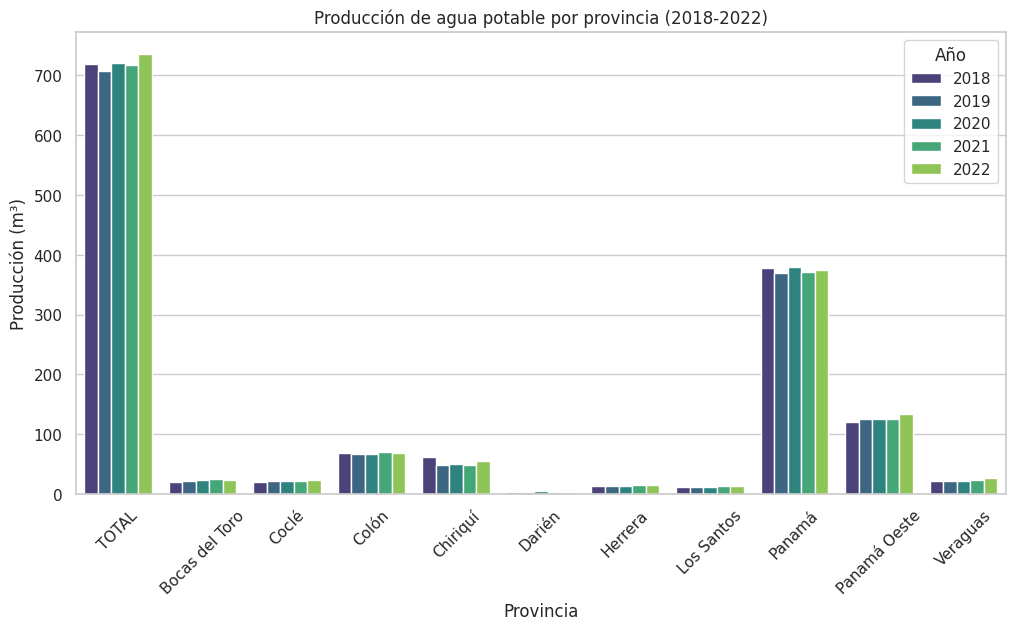

In [ ]:
# Producción de agua potable por provincia
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama prod
# Transforma de wide a long para graficar
prod_long = prod.melt(id_vars='Provincia', var_name='Año', value_name='Producción (m³)')

plt.figure(figsize=(12,6))
sns.barplot(data=prod_long, x='Provincia', y='Producción (m³)', hue='Año', palette='viridis')
plt.title('Producción de agua potable por provincia (2018-2022)')
plt.ylabel('Producción (m³)')
plt.xlabel('Provincia')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.show()


Consumo de agua potable por tipo de usuario (2018-2022)

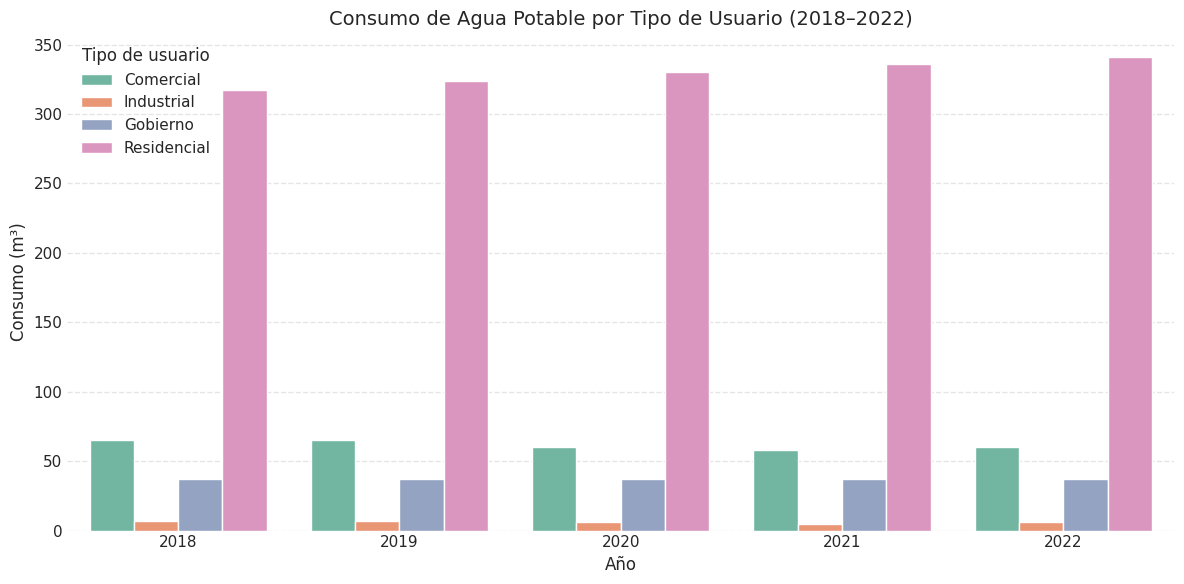

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Gráfico de barras agrupadas
sns.barplot(
    data=cons_long,
    x="Año",
    y="Consumo",
    hue="Tipo de usuario",
    palette="Set2"
)

plt.title("Consumo de Agua Potable por Tipo de Usuario (2018–2022)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Consumo (m³)", fontsize=12)
plt.legend(title="Tipo de usuario")
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Solo líneas horizontales
plt.tight_layout()
plt.show()


/tmp/ipython-input-531940496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cons_long, x='Tipo de usuario', y='Consumo', palette='Set3')


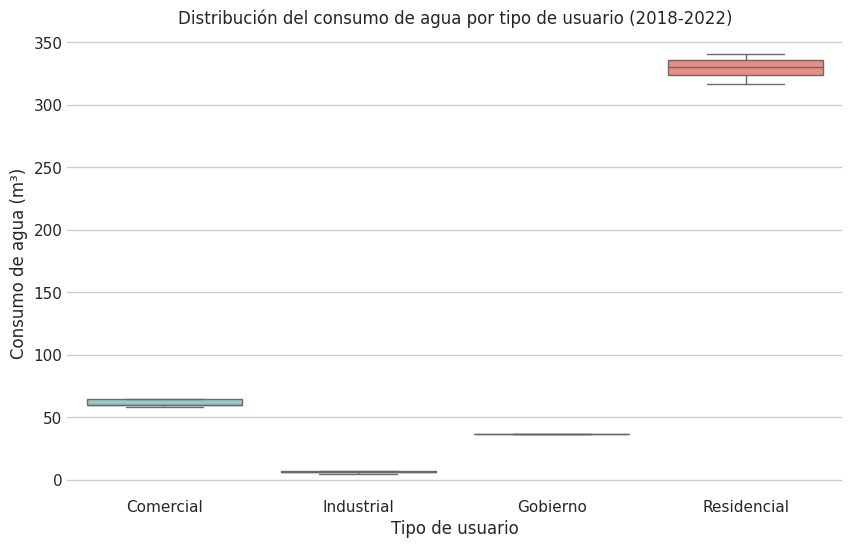

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=cons_long, x='Tipo de usuario', y='Consumo', palette='Set3')
plt.title('Distribución del consumo de agua por tipo de usuario (2018-2022)')
plt.ylabel('Consumo de agua (m³)')
plt.xlabel('Tipo de usuario')
plt.show()


Casos totales de enfermedades hidroalimentarias por provincia y año

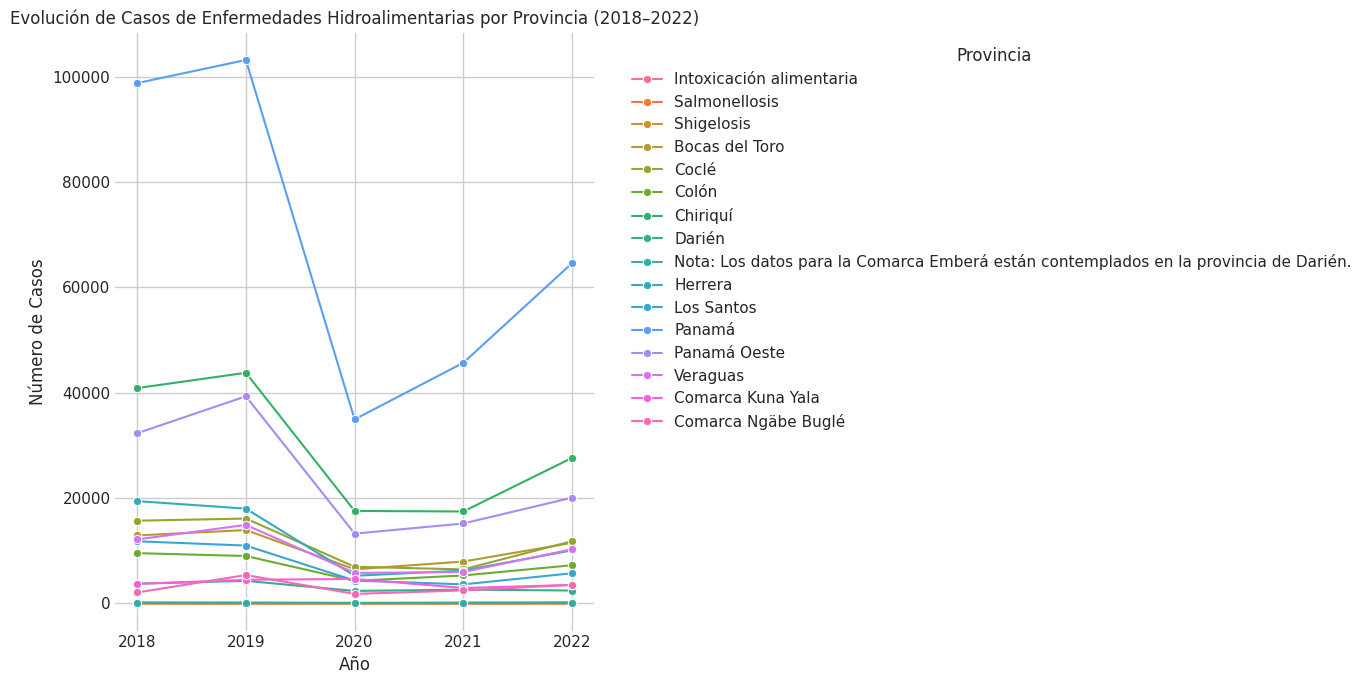

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.lineplot(
    data=enfer_long,
    x='Año',
    y='Casos',
    hue='Tipo, Provincia y Comarca Indígena',
    marker='o'
)

plt.title('Evolución de Casos de Enfermedades Hidroalimentarias por Provincia (2018–2022)')
plt.xlabel('Año')
plt.ylabel('Número de Casos')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Evolución de Casos de Enfermedades Hidroalimentarias por Provincia (2018–2022)


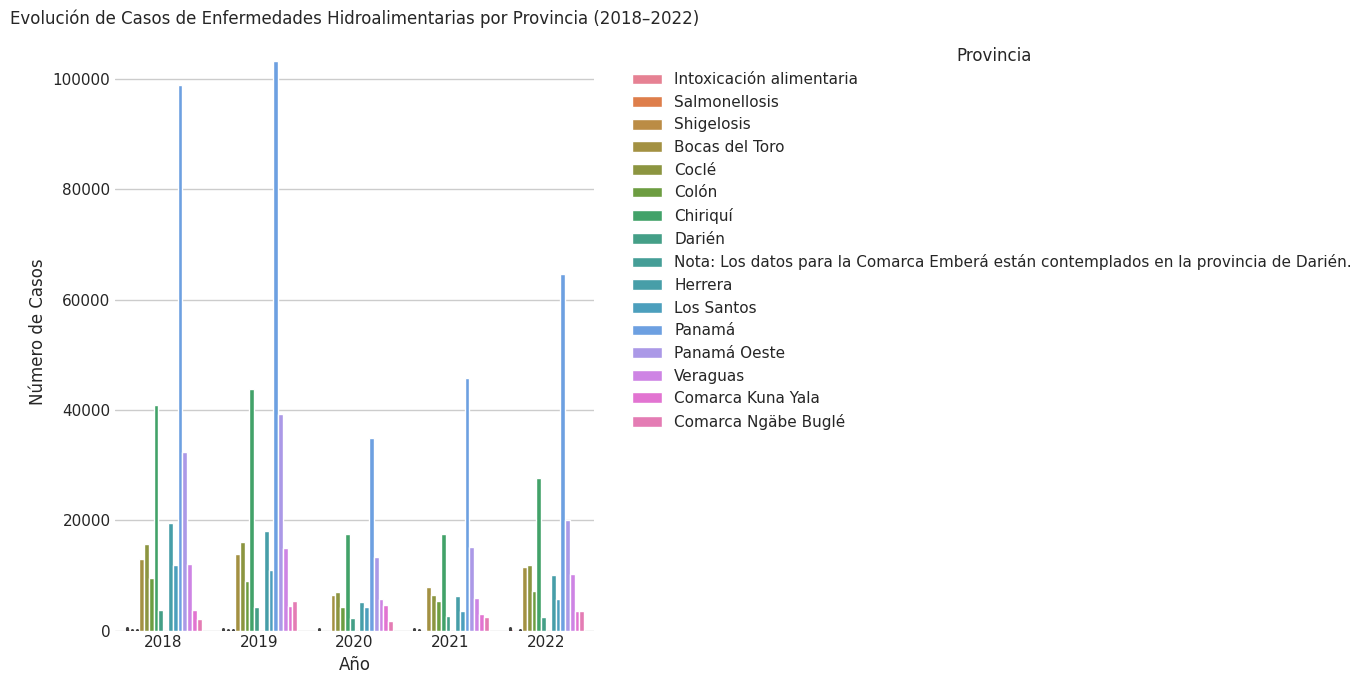

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))

# Convertimos a gráfico de barras
sns.barplot(
    data=enfer_long,
    x='Año',
    y='Casos',
    hue='Tipo, Provincia y Comarca Indígena'
)

plt.title('Evolución de Casos de Enfermedades Hidroalimentarias por Provincia (2018–2022)')
plt.xlabel('Año')
plt.ylabel('Número de Casos')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


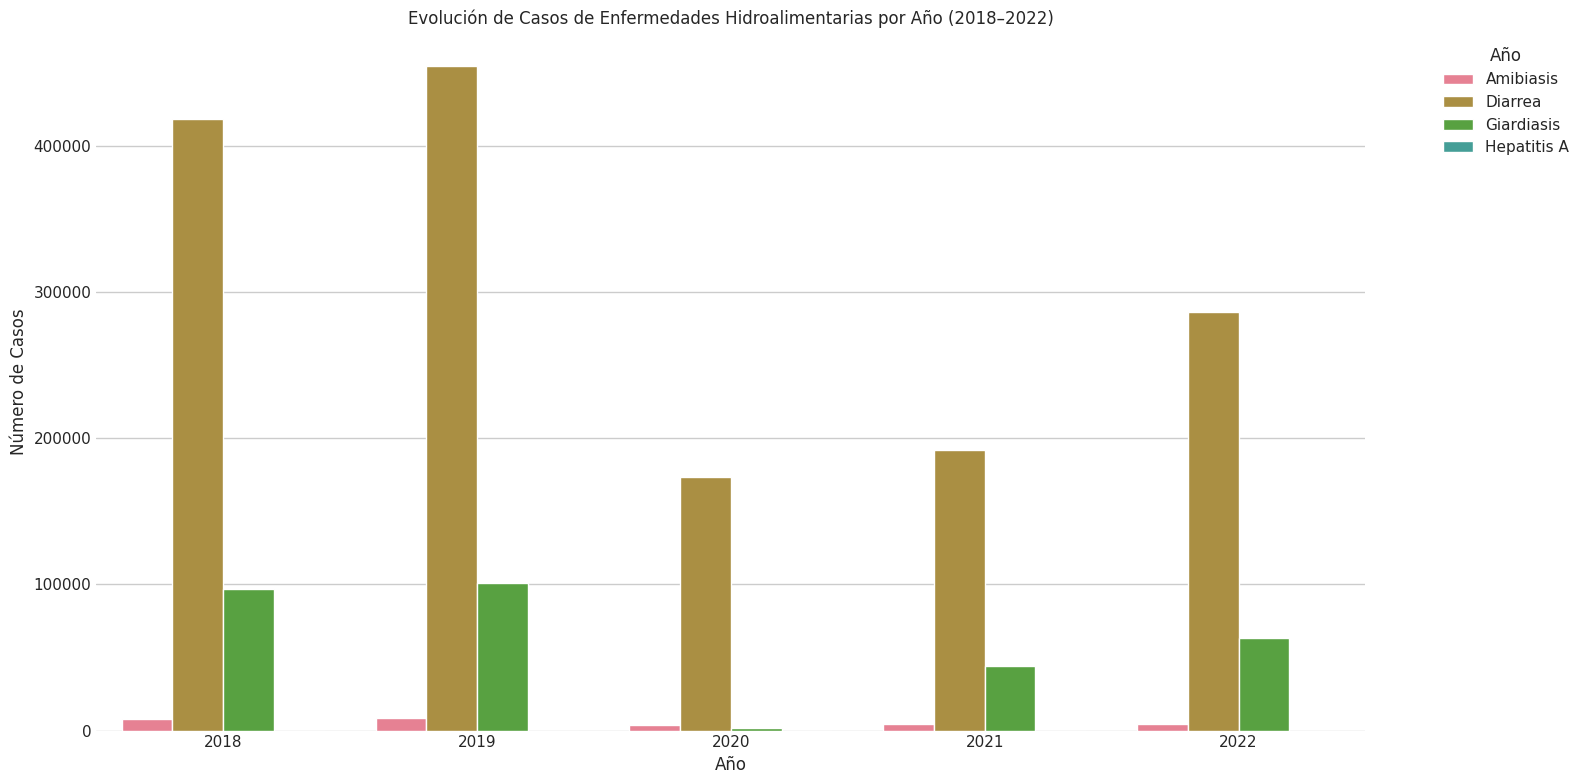

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar por año y provincia para sumar los casos
enf_grouped = enf_long.groupby(['Año', 'Tipo, Provincia y Comarca Indígena'])['Casos'].sum().reset_index()

plt.figure(figsize=(16,8))

# Gráfico de barras
sns.barplot(
    data=enf_grouped,
    x='Año',
    y='Casos',
    hue='Tipo, Provincia y Comarca Indígena'
)

plt.title('Evolución de Casos de Enfermedades Hidroalimentarias por Año (2018–2022)')
plt.xlabel('Año')
plt.ylabel('Número de Casos')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Comparación de casos por enfermedad cada año

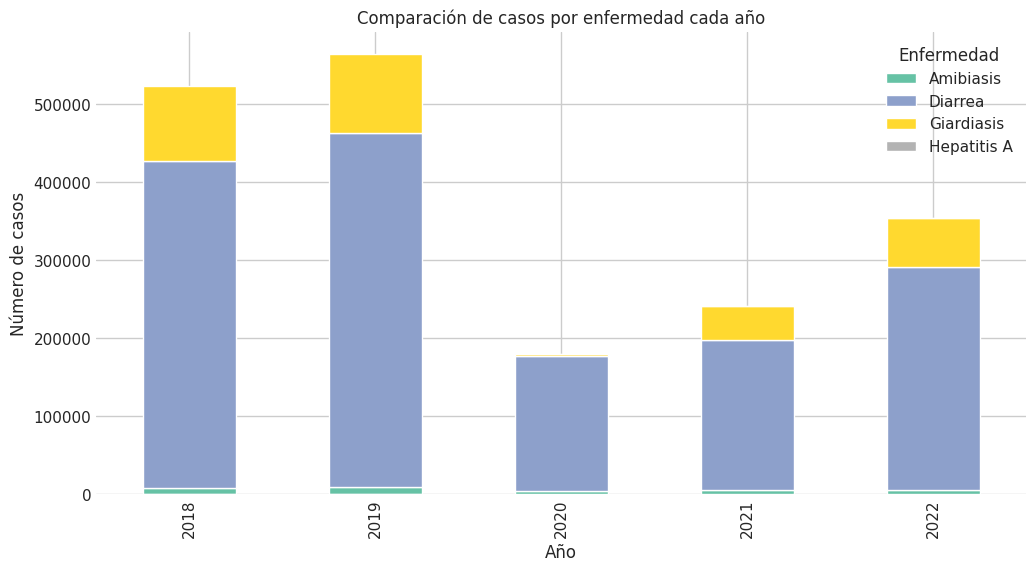

In [ ]:
enf_year = enf_long.groupby(['Año', 'Tipo, Provincia y Comarca Indígena'])['Casos'].sum().unstack()
enf_year.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Comparación de casos por enfermedad cada año')
plt.ylabel('Número de casos')
plt.xlabel('Año')
plt.legend(title='Enfermedad')
plt.show()


Comparación Producción vs Consumo de Agua Por Tipo de Usuario

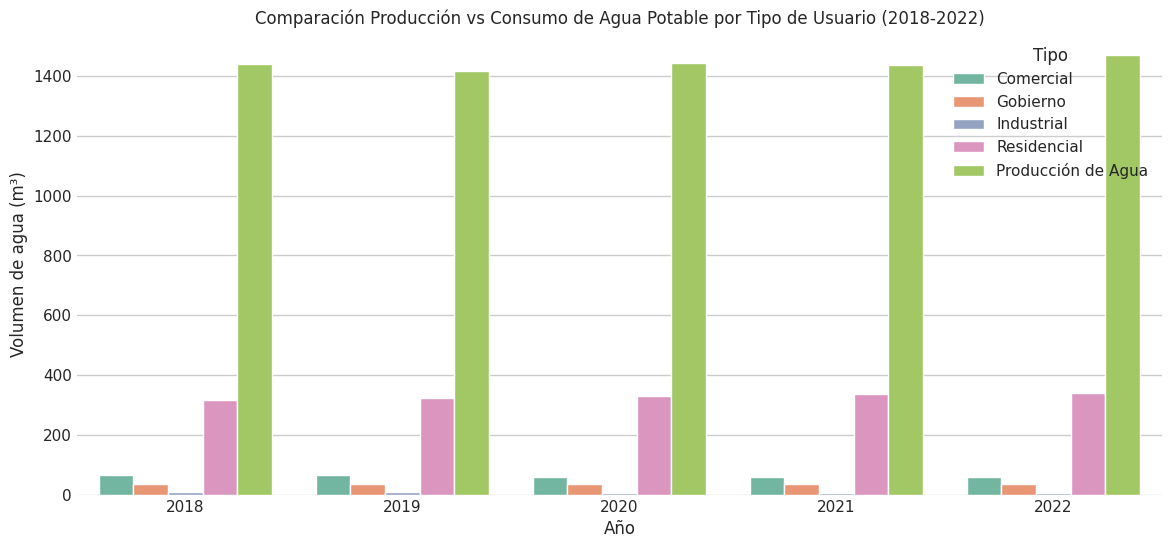

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que las columnas Año sean string
prod_total['Año'] = prod_total['Año'].astype(str)
cons_long['Año'] = cons_long['Año'].astype(str)

# Agrupar consumo por año y tipo de usuario
cons_agrup = cons_long.groupby(['Año', 'Tipo de usuario'], as_index=False)['Consumo'].sum()

# Para poder graficar junto con producción, agregamos la producción total como "Tipo de usuario = Producción"
prod_agrup = prod_total.copy()
prod_agrup['Tipo de usuario'] = 'Producción de Agua'
prod_agrup.rename(columns={'Producción (m³)':'Consumo'}, inplace=True)

# Unir producción y consumo en un solo DataFrame
comp_total = pd.concat([cons_agrup, prod_agrup[['Año','Tipo de usuario','Consumo']]])

# Gráfico de barras agrupadas
plt.figure(figsize=(14,6))
sns.barplot(data=comp_total, x='Año', y='Consumo', hue='Tipo de usuario', palette='Set2')
plt.title('Comparación Producción vs Consumo de Agua Potable por Tipo de Usuario (2018-2022)')
plt.ylabel('Volumen de agua (m³)')
plt.xlabel('Año')
plt.legend(title='Tipo')
plt.show()


Producción del agua vs Casos de Enfermedades (2018-2022)

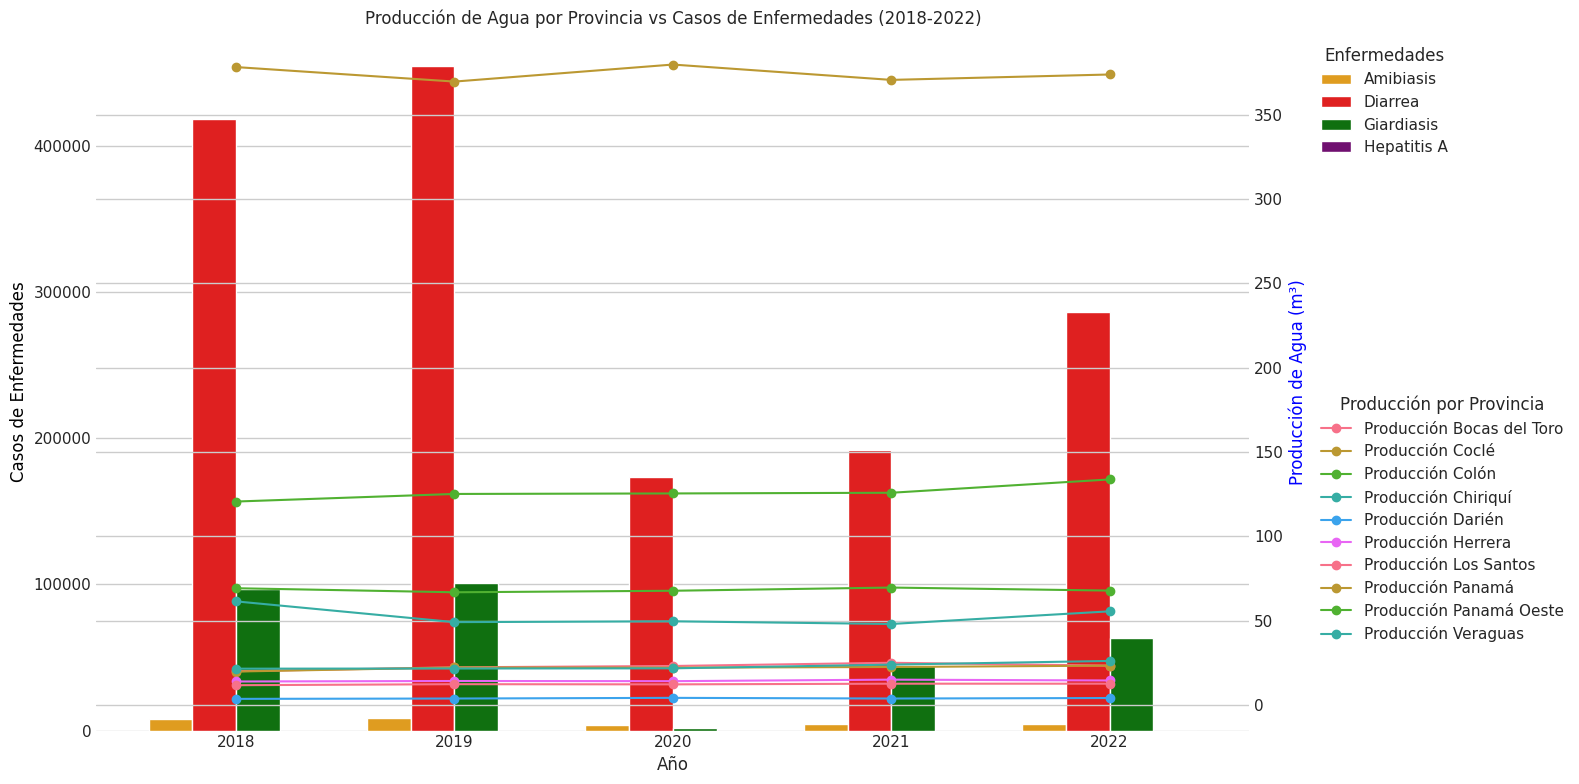

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir Año a string
prod_long['Año'] = prod_long['Año'].astype(str)
enf_long['Año'] = enf_long['Año'].astype(str)

# Filtrar solo las enfermedades principales
enfermedades = ['Amibiasis','Diarrea','Giardiasis','Hepatitis A']
enf_principales = enf_long[enf_long['Tipo, Provincia y Comarca Indígena'].isin(
    enfermedades
)].copy()

# Crear figura
fig, ax1 = plt.subplots(figsize=(16,8))

# Colores para enfermedades (re-definir para robustez)
colores_enf = {'Diarrea':'red','Amibiasis':'orange','Giardiasis':'green','Hepatitis A':'purple'}

# Preparar datos de enfermedades para el barplot (casos sumados por año y tipo de enfermedad)
enf_cases_by_year = enf_principales.groupby(['Año', 'Tipo, Provincia y Comarca Indígena'])['Casos'].sum().unstack().fillna(0)
enf_cases_by_year = enf_cases_by_year.reset_index().melt(id_vars='Año', var_name='Tipo de Enfermedad', value_name='Casos')

sns.barplot(
    data=enf_cases_by_year,
    x='Año',
    y='Casos',
    hue='Tipo de Enfermedad',
    dodge=True,
    ax=ax1,
    palette=colores_enf
)

ax1.set_ylabel('Casos de Enfermedades', color='black')
ax1.set_xlabel('Año')
ax1.set_title('Producción de Agua por Provincia vs Casos de Enfermedades (2018-2022)')

# Líneas: Producción de agua por provincia
ax2 = ax1.twinx()

# Filtrar la provincia 'TOTAL' para una vista más centrada en las provincias individuales
prod_provinces = prod_long[prod_long['Provincia'] != 'TOTAL'].copy()

for prov in prod_provinces['Provincia'].unique():
    df_prod = prod_provinces[prod_provinces['Provincia'] == prov].sort_values('Año')
    ax2.plot(
        df_prod['Año'], # Usar solo el Año para el eje X para alinear con las barras de enfermedades
        df_prod['Producción (m³)'],
        marker='o',
        linestyle='-',
        label=f'Producción {prov}'
    )

ax2.set_ylabel('Producción de Agua (m³)', color='blue')

# Leyendas
ax1.legend(title='Enfermedades', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.legend(title='Producción por Provincia', bbox_to_anchor=(1.05, 0.5), loc='upper left')

plt.xticks(rotation=45) # Rotar para mejor legibilidad
plt.tight_layout()
plt.show()

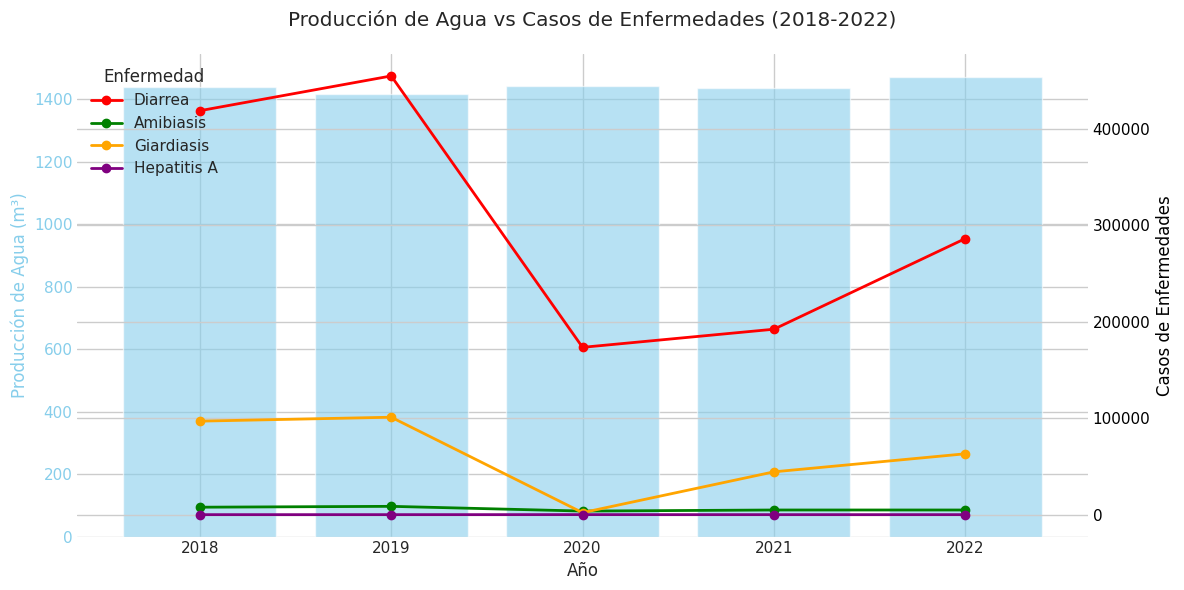

In [ ]:
import matplotlib.pyplot as plt

# Limpieza de columnas de Casos
enfermedades = ['Diarrea','Amibiasis','Giardiasis','Hepatitis A']
enf_filtrado = enf_long[enf_long['Tipo, Provincia y Comarca Indígena'].isin(enfermedades)].copy()

# Quitar comas y guiones, convertir a int
enf_filtrado['Casos'] = enf_filtrado['Casos'].astype(str).str.replace(',', '')
enf_filtrado['Casos'] = enf_filtrado['Casos'].replace('-', '0')
enf_filtrado['Casos'] = enf_filtrado['Casos'].astype(int)

# Agrupar por año y enfermedad
enf_agrupada = enf_filtrado.groupby(['Año','Tipo, Provincia y Comarca Indígena'], as_index=False)['Casos'].sum()

# Producción total por año (asegurarse que está en int)
prod_total = prod_long.groupby('Año', as_index=False)['Producción (m³)'].sum()
prod_total['Producción (m³)'] = prod_total['Producción (m³)'].astype(int)

# Convertir Año a string
prod_total['Año'] = prod_total['Año'].astype(str)
enf_agrupada['Año'] = enf_agrupada['Año'].astype(str)

# Gráfico combinado
fig, ax1 = plt.subplots(figsize=(12,6))

# Barras: Producción de agua
ax1.bar(prod_total['Año'], prod_total['Producción (m³)'], color='skyblue', alpha=0.6, label='Producción de Agua')
ax1.set_xlabel('Año')
ax1.set_ylabel('Producción de Agua (m³)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Líneas: Casos de enfermedades
ax2 = ax1.twinx()
colors = ['red','green','orange','purple']
for i, enf in enumerate(enfermedades):
    data = enf_agrupada[enf_agrupada['Tipo, Provincia y Comarca Indígena']==enf]
    ax2.plot(data['Año'], data['Casos'], marker='o', linewidth=2, label=enf, color=colors[i])
ax2.set_ylabel('Casos de Enfermedades', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Título y leyenda
fig.suptitle('Producción de Agua vs Casos de Enfermedades (2018-2022)')
fig.tight_layout()
ax2.legend(title='Enfermedad', loc='upper left')
plt.show()


## Arquitectura del Proyecto

```text
Fase                         | Herramienta / Formato
-----------------------------------------------------------
1. Obtención de datos        | Archivos .csv (pandas.read_csv)
2. Limpieza de datos         | Pandas (drop, rename, fillna, etc.)
3. Transformación/Preparación| Pandas / NumPy
4. Análisis exploratorio     | Pandas / Seaborn / Matplotlib
5. Visualización             | Seaborn / Matplotlib

